In [214]:
import jax
import jax.numpy as jnp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jax.config.update("jax_enable_x64", True)

data = pd.read_csv('data/BTC-USD.csv')

In [215]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-18,7890.520020,8245.509766,7397.990234,8223.679688,8223.679688,6639190016
1,2018-03-19,8344.120117,8675.870117,8182.399902,8630.650391,8630.650391,6729110016
2,2018-03-20,8619.669922,9051.019531,8389.889648,8913.469727,8913.469727,6361789952
3,2018-03-21,8937.480469,9177.370117,8846.330078,8929.280273,8929.280273,6043129856
4,2018-03-22,8939.440430,9100.709961,8564.900391,8728.469727,8728.469727,5530390016


In [216]:
# Drop Adj Close column
data.drop(['Date', 'Adj Close'], axis=1, inplace=True)
data.head()

,Open,High,Low,Close,Volume
0,7890.520020,8245.509766,7397.990234,8223.679688,6639190016
1,8344.120117,8675.870117,8182.399902,8630.650391,6729110016
2,8619.669922,9051.019531,8389.889648,8913.469727,6361789952
3,8937.480469,9177.370117,8846.330078,8929.280273,6043129856
4,8939.440430,9100.709961,8564.900391,8728.469727,5530390016


In [217]:
# Express volume in billions
data['Volume'] *= 1e-9

In [218]:
# Add data from k previous days for each row
k = 10
for i in range(1, k+1):
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        data['{}-{}'.format(col, i)] = data[col].shift(i)

data.dropna(inplace=True)

In [219]:
data.describe()

,Open,High,Low,Close,Volume,Open-1,High-1,Low-1,Close-1,Volume-1,...,Open-9,High-9,Low-9,Close-9,Volume-9,Open-10,High-10,Low-10,Close-10,Volume-10
count,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,...,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000,1817.000000
mean,20857.797230,21361.289703,20303.544500,20866.128215,27.369887,20847.204842,21350.576696,20292.848793,20855.357133,27.350461,...,20785.482004,21283.686436,20231.258300,20789.685642,27.193827,20777.870799,21276.225122,20224.206943,20783.004661,27.180769
std,16901.029478,17347.048177,16380.335956,16894.360520,19.582743,16902.928981,17349.143002,16382.154610,16896.428596,19.587043,...,16921.079307,17366.985403,16399.837843,16913.960604,19.606833,16923.768784,17369.674350,16402.601048,16916.526542,19.612619
min,3236.274658,3275.377930,3191.303467,3236.761719,2.923670,3236.274658,3275.377930,3191.303467,3236.761719,2.923670,...,3236.274658,3275.377930,3191.303467,3236.761719,2.923670,3236.274658,3275.377930,3191.303467,3236.761719,2.923670
25%,7685.140137,7899.229980,7523.439941,7680.066406,14.808831,7685.140137,7899.229980,7523.439941,7680.066406,14.797486,...,7685.140137,7899.229980,7523.439941,7680.066406,14.616451,7685.140137,7899.229980,7521.672363,7680.066406,14.601632
50%,11713.306641,11902.335938,11393.374023,11742.037109,25.293776,11679.696289,11900.411133,11347.578125,11711.505859,25.245862,...,11541.054688,11799.092773,11290.793945,11555.363281,25.041427,11528.189453,11796.396484,11290.731445,11542.500000,25.015251
75%,33889.605469,34909.261719,32384.228516,33855.328125,36.154506,33889.605469,34909.261719,32384.228516,33855.328125,36.150573,...,33889.605469,34909.261719,32384.228516,33855.328125,35.887250,33889.605469,34909.261719,32384.228516,33855.328125,35.887250
max,67549.734375,68789.625000,66382.062500,67566.828125,350.967941,67549.734375,68789.625000,66382.062500,67566.828125,350.967941,...,67549.734375,68789.625000,66382.062500,67566.828125,350.967941,67549.734375,68789.625000,66382.062500,67566.828125,350.967941


In [220]:
X = data.drop('Close', axis=1).to_numpy()
y = data['Close'].to_numpy()
X.shape, y.shape
n_features = X.shape[1]

In [221]:
N = len(data)
train_split = 0.8
n_train = int(train_split * N)

X_train = X[:n_train]
y_train = y[:n_train]

X_test = X[n_train:]
y_test = y[n_train:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1453, 54), (1453,), (364, 54), (364,))

# Linear regression approach

## Lasso regression
We will perform lasso regression on the dataset to remove uninformative or redundant features

In [222]:
# Shuffle the dataset
idx = np.arange(N)
np.random.shuffle(idx)
X_shuffle = X[idx]
y_shuffle = y[idx]

In [238]:
w = np.random.randn(n_features)

def lasso_loss(X, y, w, l):
    y_pred = (X @ w)
    return jnp.mean(((y_pred - y))**2) + l * jnp.sum(jnp.abs(w))

lasso_grad = jax.jit(jax.grad(lasso_loss, argnums=2))

# Optimize with GD
gamma = 1e-12
n_epochs = 1000
l = 1e-6

for epoch in range(n_epochs):
    w -= gamma * lasso_grad(X_shuffle, y_shuffle, w, l)
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: {lasso_loss(X_train, y_train, w, l)}')
w

Epoch 0: 22348297330.483192
Epoch 100: 78150989.28616871
Epoch 200: 77939116.80376351
Epoch 300: 77803381.06562276
Epoch 400: 77668224.30022863
Epoch 500: 77533625.02654506
Epoch 600: 77399576.85564837
Epoch 700: 77266073.53448741
Epoch 800: 77133108.91866036
Epoch 900: 77000676.97031611


DeviceArray([ 2.26319037,  0.51259889, -0.6667471 ,  0.27974141,
             -0.76492931,  1.31915906,  2.23205449, -0.96435883,
              0.09707629, -0.75771768,  0.07165319,  1.39507635,
              0.72921308, -1.13670224, -1.69625078, -1.95835211,
             -1.5749332 , -0.31926202,  0.12890552,  0.29333253,
             -0.57179395,  0.19722222, -1.53037405, -1.35221069,
              1.91754868, -0.05886525,  0.98456359, -1.94036287,
              0.40354834,  2.05474435,  1.17547016, -1.47983848,
             -0.06200103, -0.59173324, -0.08339426,  1.68067081,
             -0.26835442,  0.9260689 , -0.928772  , -0.10742367,
             -1.44015944, -0.65686828,  0.11273753,  0.40593893,
              0.32792249, -1.93979726,  0.11715005,  0.62304846,
              0.75048369, -1.28824491,  2.00657213,  0.84730392,
             -0.64109668, -0.34181505], dtype=float64)

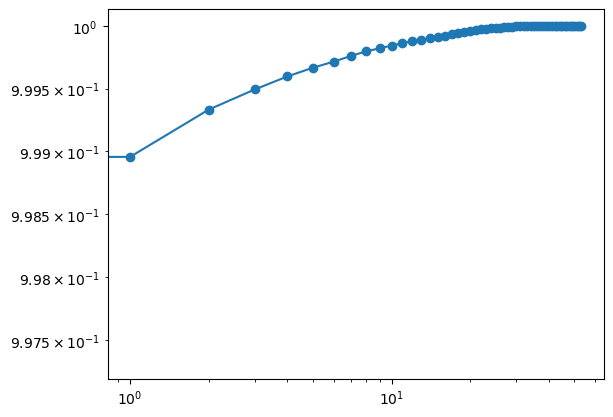

In [241]:
U, sigma, VT = np.linalg.svd(X_train, full_matrices=False)

plt.loglog(np.cumsum(sigma**2)/np.sum(sigma**2), 'o-')
plt.show()

In [272]:
Phi = (X_train @ VT.T)[:, :10]
Phi.shape

Phi_test = (X_test @ VT.T)[:, :10]
Phi_test.shape

(364, 10)

In [263]:
# create a feedforward neural network with tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(10, input_shape=(10,)))
model.add(Activation('relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')

model.fit(Phi, y_train[:, None], epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000
46/46 [==============================] - 0s 390us/step - loss: 12150537.0000
Epoch 2/1000
46/46 [==============================] - 0s 425us/step - loss: 1301571.2500
Epoch 3/1000
46/46 [==============================] - 0s 432us/step - loss: 1013621.5000
Epoch 4/1000
46/46 [==============================] - 0s 305us/step - loss: 872720.8125
Epoch 5/1000
46/46 [==============================] - 0s 306us/step - loss: 767030.8750
Epoch 6/1000
46/46 [==============================] - 0s 303us/step - loss: 701265.6875
Epoch 7/1000
46/46 [==============================] - 0s 308us/step - loss: 661942.8750
Epoch 8/1000
46/46 [==============================] - 0s 314us/step - loss: 634947.2500
Epoch 9/1000
46/46 [==============================] - 0s 300us/step - loss: 616525.3750
Epoch 10/1000
46/46 [==============================] - 0s 291us/step - loss: 613784.6875
Epoch 11/1000
46/46 [==============================] - 0s 301us/step - loss: 571466.1875
Epoch 12/1000
46/46 [=====

In [264]:
model.evaluate(Phi_test, y_test)

12/12 [==============================] - 0s 377us/step - loss: 331619.5625


331619.5625

12/12 [==============================] - 0s 494us/step


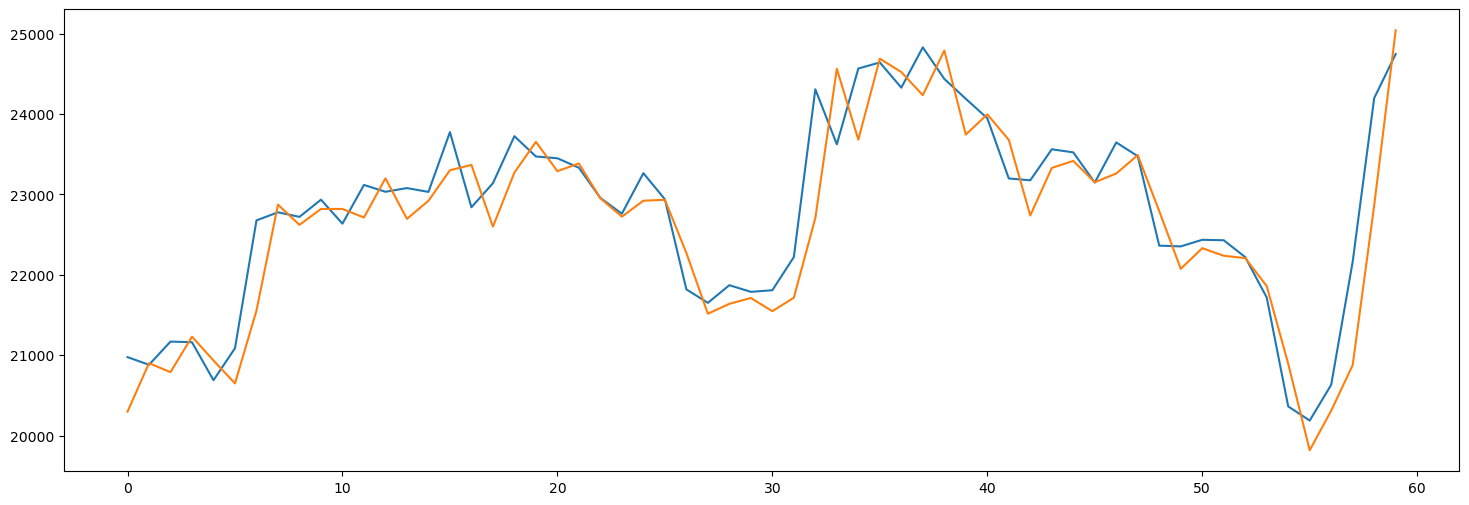

In [273]:
start = 300
end = 360

plt.figure(figsize=(18,6))
plt.plot(y_test[start:end], label='True')
plt.plot(model.predict(Phi_test)[start:end], label='Predicted')

In [331]:
# Define the y labels with 1 if the price goes up wrt the previous day 0 otherwise
y_train_labels = (y_train[1:] > y_train[:-1]).astype(int)
y_test_labels = (y_test[1:] > y_test[:-1]).astype(int)

# Create a neural network with 2 outputs after a softmax layer
model = Sequential()
model.add(Dense(10, input_shape=(10,)))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(optimizer=Adam(learning_rate=1e-2), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [337]:
# Train the model
model.fit(Phi[:-1], y_train_labels, epochs=1000, batch_size=32, verbose=1)

Epoch 1/1000
46/46 [==============================] - 0s 417us/step - loss: 0.6984 - accuracy: 0.5110
Epoch 2/1000
46/46 [==============================] - 0s 404us/step - loss: 0.6987 - accuracy: 0.4904
Epoch 3/1000
46/46 [==============================] - 0s 418us/step - loss: 0.6964 - accuracy: 0.5207
Epoch 4/1000
46/46 [==============================] - 0s 354us/step - loss: 0.6973 - accuracy: 0.5041
Epoch 5/1000
46/46 [==============================] - 0s 429us/step - loss: 0.6959 - accuracy: 0.5158
Epoch 6/1000
46/46 [==============================] - 0s 363us/step - loss: 0.6997 - accuracy: 0.5158
Epoch 7/1000
46/46 [==============================] - 0s 335us/step - loss: 0.6967 - accuracy: 0.5262
Epoch 8/1000
46/46 [==============================] - 0s 481us/step - loss: 0.6987 - accuracy: 0.5034
Epoch 9/1000
46/46 [==============================] - 0s 895us/step - loss: 0.6985 - accuracy: 0.5241
Epoch 10/1000
46/46 [==============================] - 0s 315us/step - loss: 0.698

In [338]:
# Evaluate the model
model.evaluate(Phi_test[:-1], y_test_labels)

12/12 [==============================] - 0s 445us/step - loss: 0.6950 - accuracy: 0.4711


[0.6949620246887207, 0.4710743725299835]

In [339]:
model.predict(Phi_test[-1][:, None].T)

1/1 [==============================] - 0s 11ms/step


array([[0.49407288, 0.5059271 ]], dtype=float32)